In [1]:
# Import libraries
import pandas as pd
from collections import defaultdict
from networkx import Graph, spring_layout, draw_networkx


In [2]:

# Load data
employee_data = pd.read_csv(r'C:\Users\Thats Me\Desktop\insight x\employees.csv')
message_data  = pd.read_csv(r"C:\Users\Thats Me\Desktop\insight x\messages.csv")


In [3]:
print("Employee Dataset:")
print(employee_data.head())

print("\nMessage Dataset:")
print(message_data.head())


Employee Dataset:
   id  department location  age
0   3  Operations       US   33
1   6       Sales       UK   50
2   8          IT   Brasil   54
3   9       Admin       UK   32
4  12  Operations   Brasil   51

Message Dataset:
   sender  receiver            timestamp  message_length
0      79        48  2021-06-02 05:41:34              88
1      79        63  2021-06-02 05:42:15              72
2      79        58  2021-06-02 05:44:24              86
3      79        70  2021-06-02 05:49:07              26
4      79       109  2021-06-02 19:51:47              73


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

Top Communicators (Degree Centrality): [('Sales', 2.4000000000000004), ('Operations', 2.4000000000000004), ('Admin', 2.4000000000000004), ('IT', 2.2), ('Engineering', 2.2)]


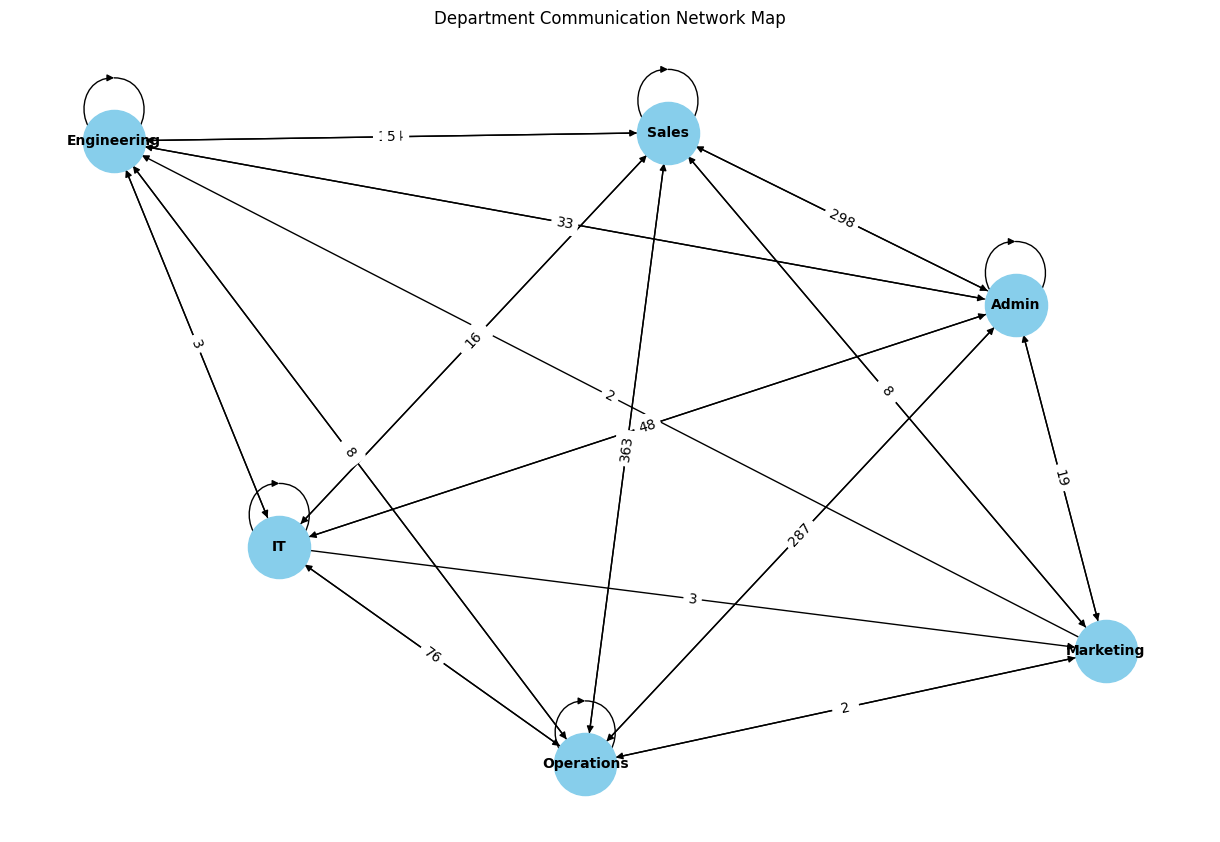

In [5]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Define functions
def clean_data(data):
    """
    Cleans and preprocesses data (handles missing values, standardizes departments, etc.)
    """
    # Implement your specific data cleaning logic based on your dataset
    # Example: handle missing values, remove irrelevant columns, standardize departments
    # ...
    return data

def create_communication_network(message_data, employee_data):
    """
    Creates a communication network graph based on departments, considering age and message length
    """
    G = nx.DiGraph()
    for index, row in message_data.iterrows():
        sender_dept = employee_data.loc[employee_data['id'] == row['sender'], 'department'].values[0]
        receiver_dept = employee_data.loc[employee_data['id'] == row['receiver'], 'department'].values[0]
        if G.has_edge(sender_dept, receiver_dept):
            # Increment message count
            G[sender_dept][receiver_dept]['message_count'] += 1
            # Add message length to edge attribute
            G[sender_dept][receiver_dept]['total_message_length'] += row['message_length']
        else:
            # Add edge with message count and message length
            G.add_edge(sender_dept, receiver_dept, message_count=1, total_message_length=row['message_length'])
    return G

def analyze_centrality(G):
    """
    Calculates and analyzes degree centrality of the communication network
    """
    degree_centrality = nx.degree_centrality(G)
    top_communicators = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top Communicators (Degree Centrality):", top_communicators)

def visualize_network(G):
    """
    Visualizes the communication network graph
    """
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G, 'message_count')
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Department Communication Network Map')
    plt.show()



# Create communication network graph
communication_network = create_communication_network(message_data, employee_data)

# Analyze centrality
analyze_centrality(communication_network)

# Visualize network
visualize_network(communication_network)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

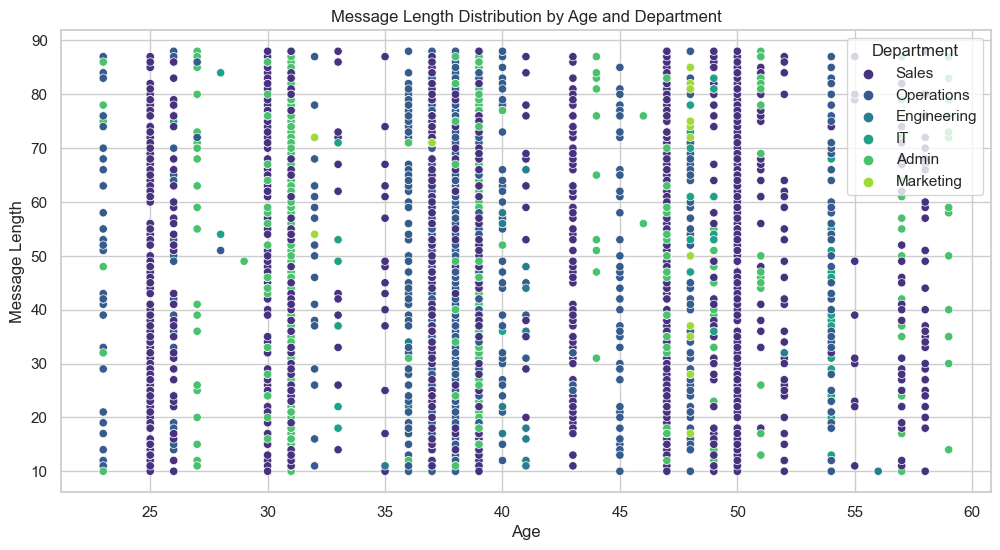

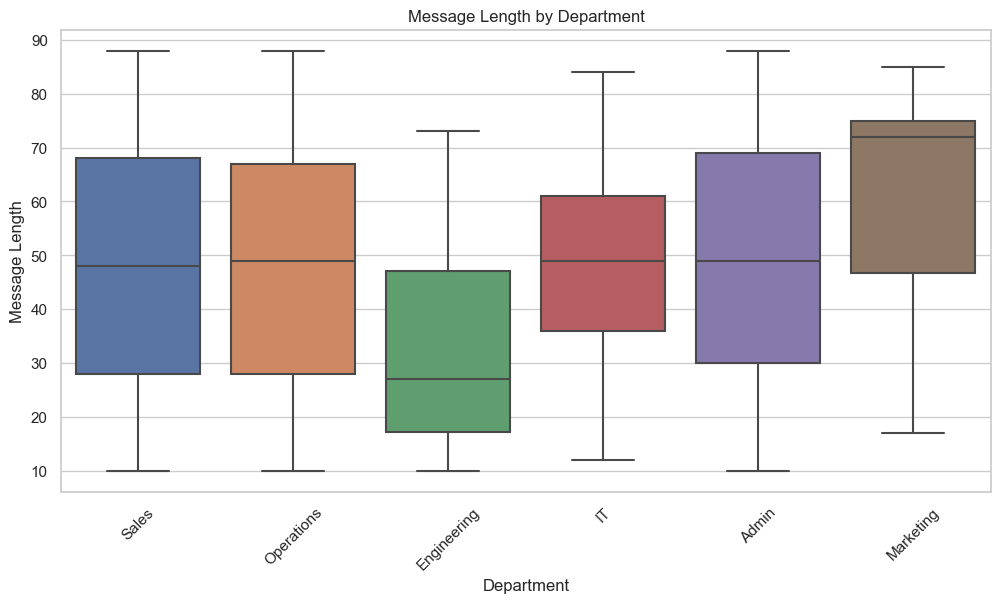

In [7]:
def create_communication_network(message_data, employee_data):
    """
    Creates a communication network graph based on departments, considering age and message length
    """
    G = nx.DiGraph()
    for index, row in message_data.iterrows():
        sender_dept = employee_data.loc[employee_data['id'] == row['sender'], 'department'].values[0]
        receiver_dept = employee_data.loc[employee_data['id'] == row['receiver'], 'department'].values[0]
        sender_age = employee_data.loc[employee_data['id'] == row['sender'], 'age'].values[0]
        receiver_age = employee_data.loc[employee_data['id'] == row['receiver'], 'age'].values[0]

        if G.has_edge(sender_dept, receiver_dept):
            # Increment message count
            G[sender_dept][receiver_dept]['message_count'] += 1
            # Add message length to edge attribute
            G[sender_dept][receiver_dept]['total_message_length'] += row['message_length']
            # Add sender and receiver age to edge attribute
            G[sender_dept][receiver_dept]['sender_age'] = sender_age
            G[sender_dept][receiver_dept]['receiver_age'] = receiver_age
        else:
            # Add edge with message count, message length, sender age, and receiver age
            G.add_edge(sender_dept, receiver_dept, message_count=1, total_message_length=row['message_length'],
                       sender_age=sender_age, receiver_age=receiver_age)
    return G

def analyze_message_length_by_age(message_data, employee_data):
    """
    Analyzes whether message length is affected by the age of the person
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))

    # Merge message and employee data
    merged_data = message_data.merge(employee_data, left_on='sender', right_on='id')

    # Plotting message length distribution by age
    sns.scatterplot(data=merged_data, x='age', y='message_length', hue='department', palette='viridis')
    plt.title('Message Length Distribution by Age and Department')
    plt.xlabel('Age')
    plt.ylabel('Message Length')
    plt.legend(title='Department')
    plt.show()

def analyze_message_length_by_department(message_data, employee_data):
    """
    Analyzes message length by department
    """
    plt.figure(figsize=(12, 6))

    # Merge message and employee data
    merged_data = message_data.merge(employee_data, left_on='sender', right_on='id')

    # Plotting message length by department
    sns.boxplot(data=merged_data, x='department', y='message_length')
    plt.title('Message Length by Department')
    plt.xlabel('Department')
    plt.ylabel('Message Length')
    plt.xticks(rotation=45)
    plt.show()



# Analyze message length by age
analyze_message_length_by_age(message_data, employee_data)

# Analyze message length by department
analyze_message_length_by_department(message_data, employee_data)

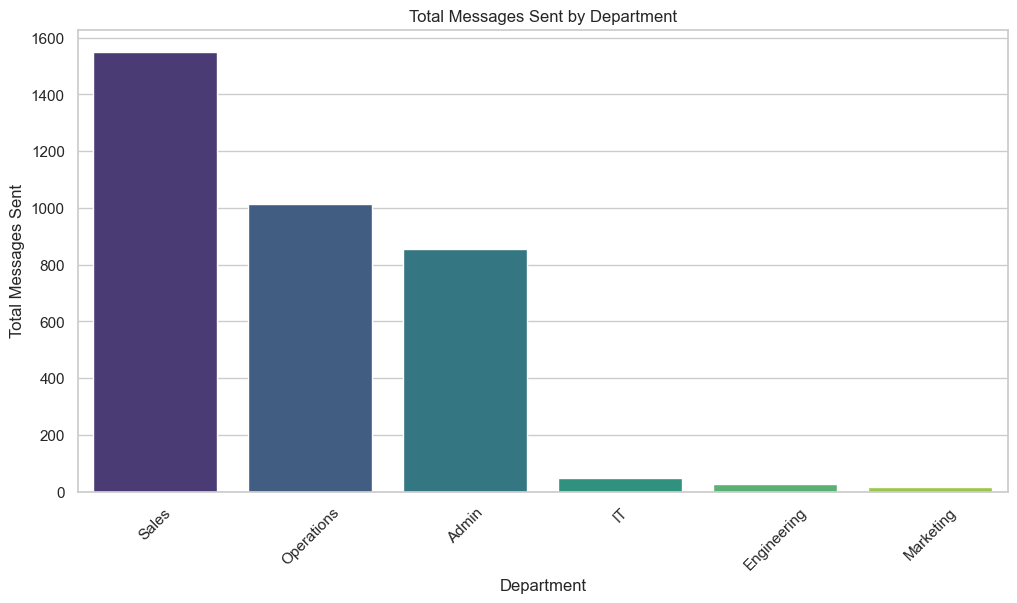

In [8]:
merged_data = message_data.merge(employee_data, left_on='sender', right_on='id')

# Calculate total messages sent by each department
messages_sent_by_department = merged_data.groupby('department')['id'].count().reset_index()
messages_sent_by_department = messages_sent_by_department.rename(columns={'id': 'total_messages'})

# Sort departments by total messages sent
messages_sent_by_department = messages_sent_by_department.sort_values(by='total_messages', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=messages_sent_by_department, x='department', y='total_messages', palette='viridis')
plt.title('Total Messages Sent by Department')
plt.xlabel('Department')
plt.ylabel('Total Messages Sent')
plt.xticks(rotation=45)
plt.show()

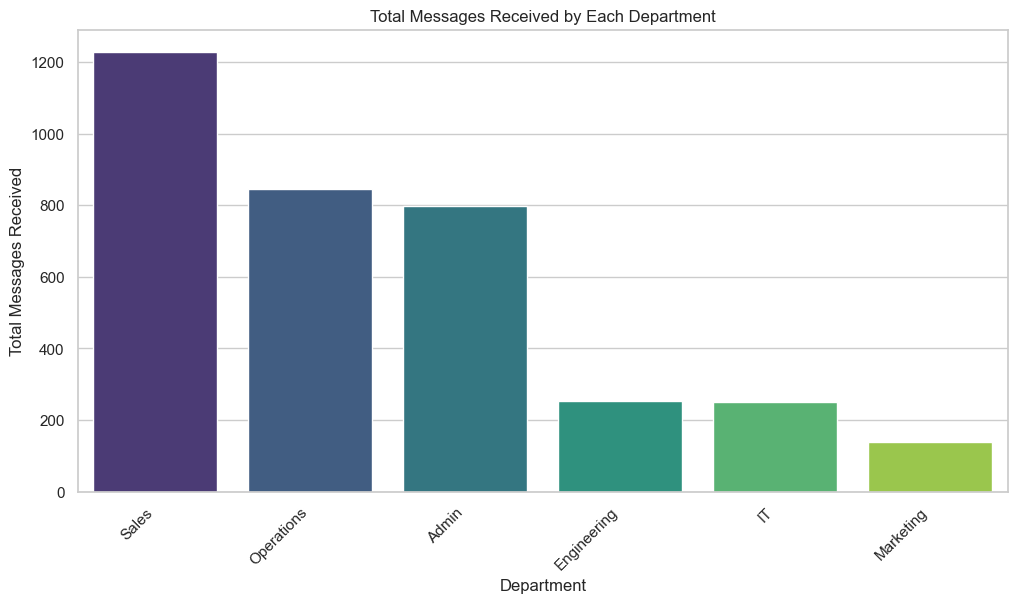

In [9]:
def analyze_message_reception(message_data, employee_data):
    """
    Analyzes the total number of messages received by each department
    """
    # Merge message and employee data to get department information for receivers
    merged_data = message_data.merge(employee_data, left_on='receiver', right_on='id')

    # Calculate total number of messages received by each department
    message_count_by_department = merged_data['department'].value_counts().reset_index()
    message_count_by_department.columns = ['Department', 'Total Messages Received']

    # Sort departments by total messages received
    message_count_by_department = message_count_by_department.sort_values(by='Total Messages Received', ascending=False)

    # Plotting total messages received by each department
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=message_count_by_department, x='Department', y='Total Messages Received', palette='viridis')
    plt.title('Total Messages Received by Each Department')
    plt.xlabel('Department')
    plt.ylabel('Total Messages Received')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()


# Analyze message reception by department
analyze_message_reception(message_data, employee_data)

In [10]:
def analyze_message_count_by_age(message_data, employee_data):
    """
    Analyzes the total number of messages sent by each age group
    """
    # Merge message and employee data to get age information for senders
    merged_data = message_data.merge(employee_data, left_on='sender', right_on='id')

    # Calculate total number of messages sent by each age group
    message_count_by_age = merged_data['age'].value_counts().reset_index()
    message_count_by_age.columns = ['Age Group', 'Total Messages Sent']

    # Sort age groups by total messages sent
    message_count_by_age = message_count_by_age.sort_values(by='Total Messages Sent', ascending=False)

    # Plotting total messages sent by each age group
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=message_count_by_age, x='Age Group', y='Total Messages Sent', palette='viridis')
    plt.title('Total Messages Sent by Each Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Total Messages Sent')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()

def analyze_message_length_by_age(message_data, employee_data):
    """
    Analyzes the average message length sent by each age group
    """
    # Merge message and employee data to get age information for senders
    merged_data = message_data.merge(employee_data, left_on='sender', right_on='id')

    # Calculate average message length sent by each age group
    avg_message_length_by_age = merged_data.groupby('age')['message_length'].mean().reset_index()
    avg_message_length_by_age.columns = ['Age Group', 'Average Message Length']

    # Sort age groups by average message length
    avg_message_length_by_age = avg_message_length_by_age.sort_values(by='Average Message Length', ascending=False)

    # Plotting average message length by each age group
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=avg_message_length_by_age, x='Age Group', y='Average Message Length', palette='viridis')
    plt.title('Average Message Length by Each Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Average Message Length')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.show()




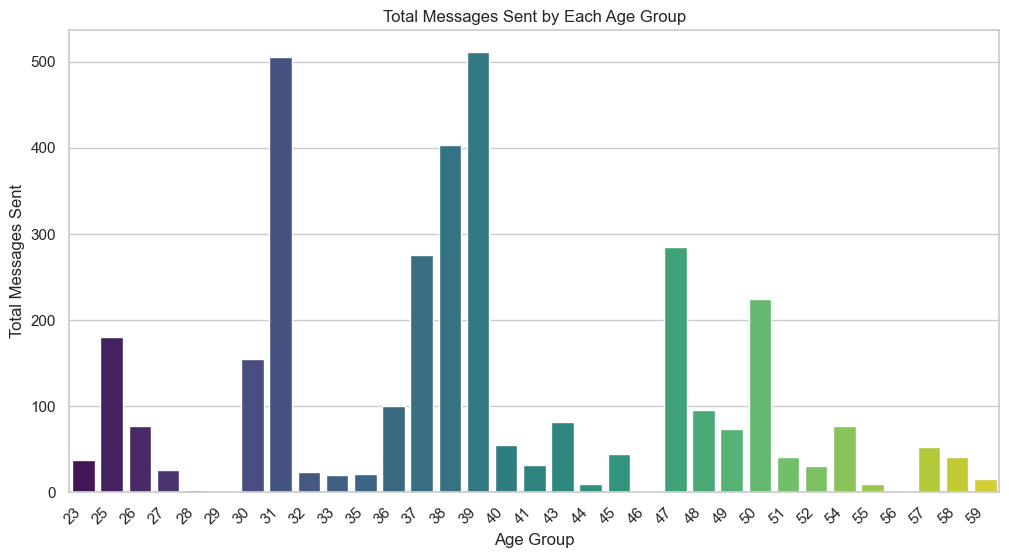

In [11]:

# Analyze message count by age
analyze_message_count_by_age(message_data, employee_data)



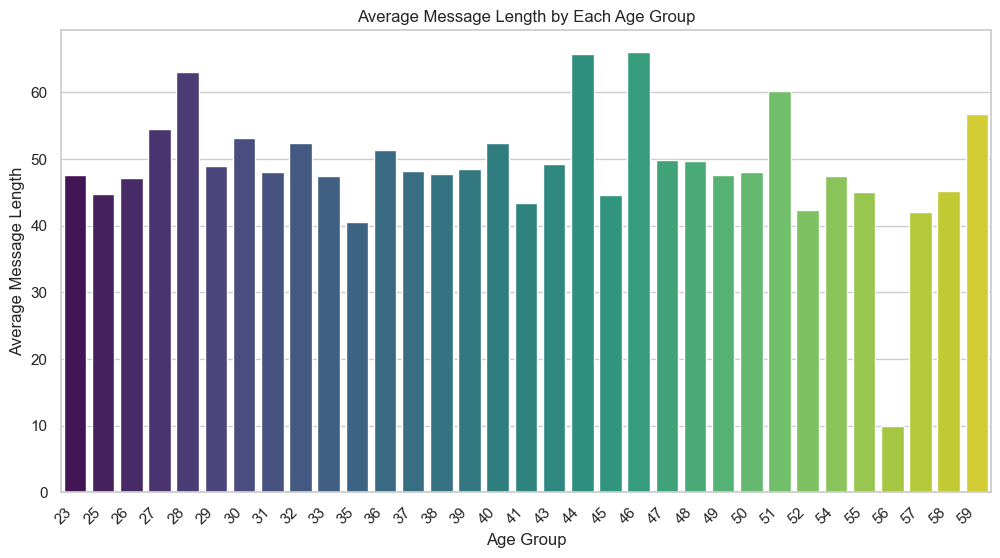

In [12]:
# Analyze message length by age
analyze_message_length_by_age(message_data, employee_data)

In [13]:
# Merge message and employee data
merged_data = pd.merge(message_data, employee_data, left_on='sender', right_on='id')

# Convert timestamp to datetime format
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

# Extract hour from timestamp
merged_data['hour'] = merged_data['timestamp'].dt.hour



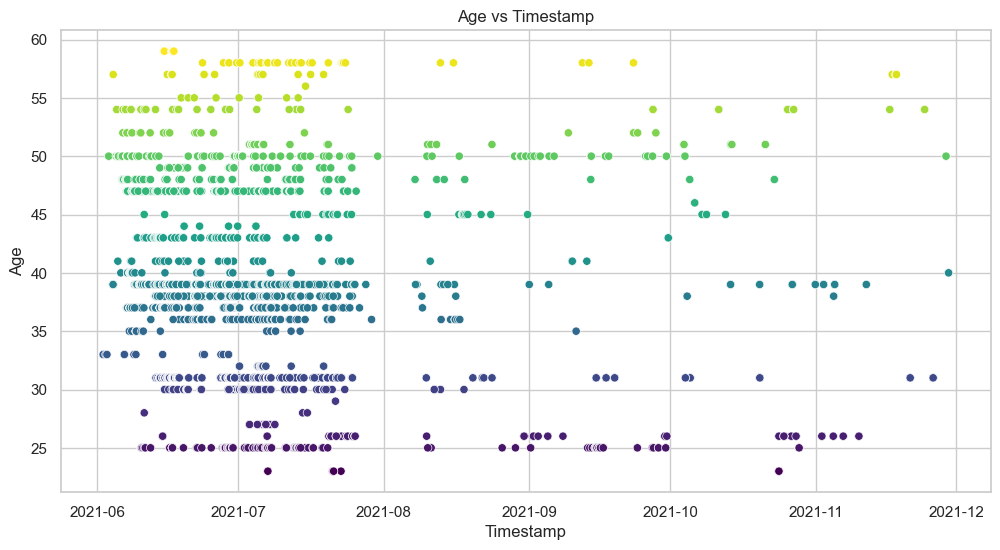

In [14]:
# Plot age vs timestamp
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='timestamp', y='age', hue='age', palette='viridis', legend=False)
plt.title('Age vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Age')
plt.show()


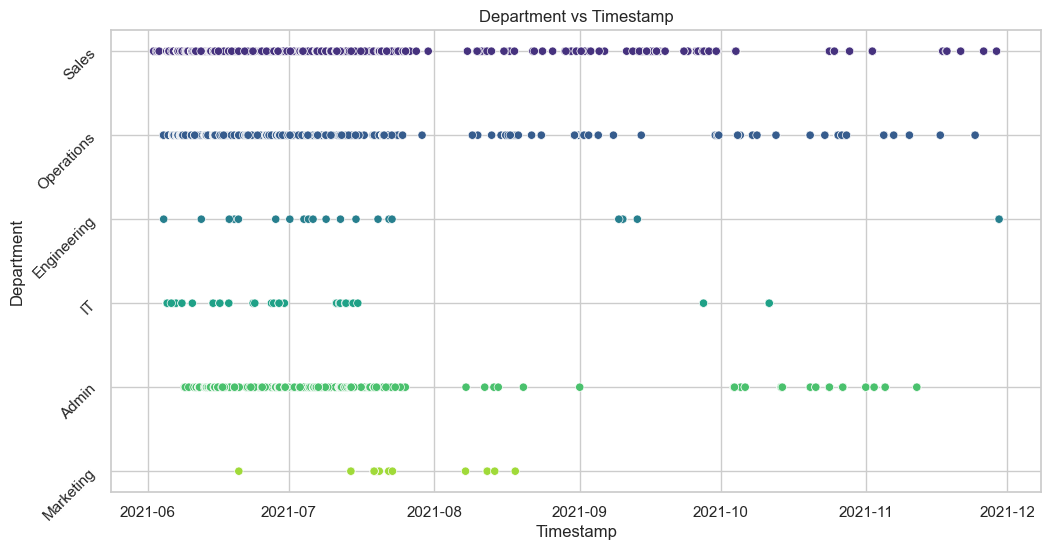

In [15]:

# Plot department vs timestamp
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='timestamp', y='department', hue='department', palette='viridis', legend=False)
plt.title('Department vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Department')
plt.yticks(rotation=45)
plt.show()



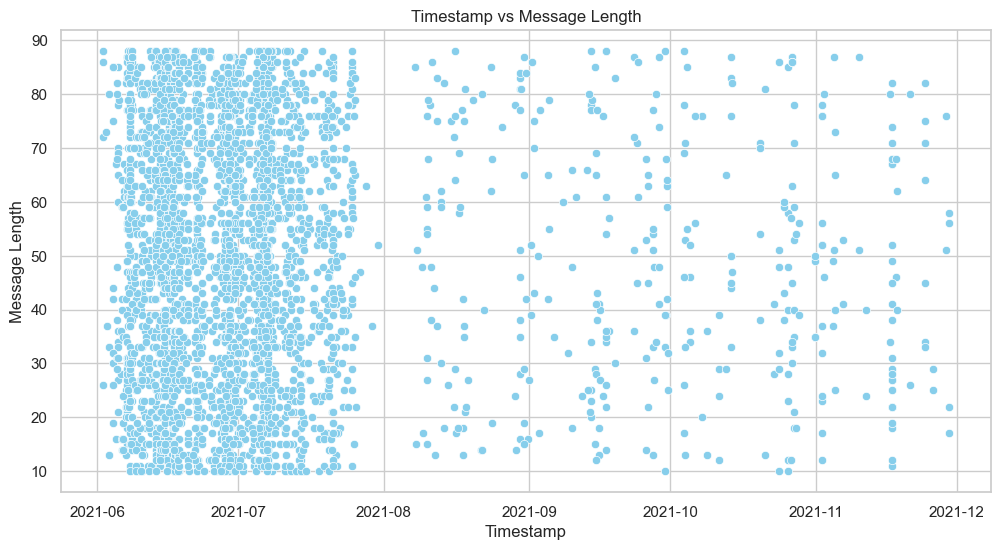

In [16]:
# Plot timestamp vs message length
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='timestamp', y='message_length', color='skyblue')
plt.title('Timestamp vs Message Length')
plt.xlabel('Timestamp')
plt.ylabel('Message Length')
plt.show()



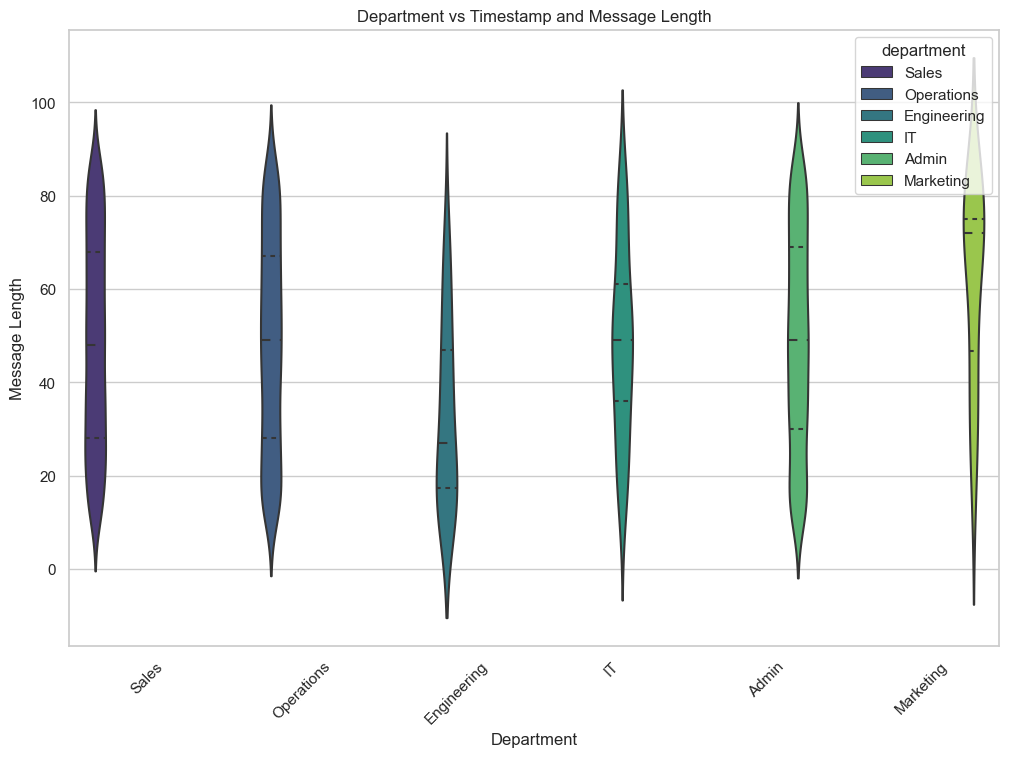

In [17]:
# Plot department vs timestamp and message length
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_data, x='department', y='message_length', hue='department', inner="quart", palette='viridis')
plt.title('Department vs Timestamp and Message Length')
plt.xlabel('Department')
plt.ylabel('Message Length')
plt.xticks(rotation=45)
plt.show()